In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_set = pd.read_csv('Datasets/train/train.csv')
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Handeling

To show more information about the dataset

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It's clear that there is alot of NaN in 
- Age = 117 NaN values
- Cabin = 687 NaN values 
- Embarked = 2 NaN values

So for Cabin we clearly haven't seen an obvious effect in the results of the prevouis notebook so we can drop the whole column .<br>
<br>





In [4]:
# remove Cabin feature 
train_set = train_set.drop(['Cabin'],axis=1)
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


And Embarked's NaN values can be filled with the mode . <br>

In [5]:
train_set["Embarked"].mode(dropna=True)


0    S
dtype: object

In [6]:
# fill NaN with the mode value
train_set['Embarked'].fillna(value='S',inplace=True)

### Ways to deal with NaN values :
- Dropping the column
- Dropping only the null values row-wise
- Dropping only the null values row-wise
- Filling the cell containing NaN values with previous entry
- Iterating through a column & doing operation on Non NaN
<br>[What’s the best way to handle NaN values?](https://towardsdatascience.com/whats-the-best-way-to-handle-nan-values-62d50f738fc)

In [7]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, 'Frequency')

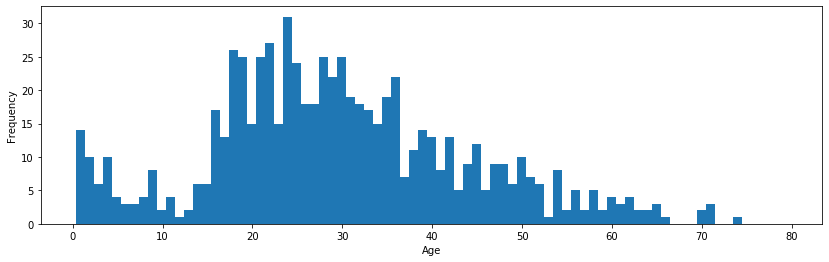

In [8]:
# Age distribuation 
fig , ax = plt.subplots(figsize=(14,4))
ax.hist(x = train_set['Age'], bins = np.arange(train_set['Age'].min() , train_set['Age'].max()) )
ax.yaxis.tick_left()
plt.xlabel('Age')
plt.ylabel('Frequency')

In [9]:
train_set["Age"].mode(dropna=True)

0    24.0
dtype: float64

In [10]:
train_set["Age"].mean()

29.69911764705882

In [11]:
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [12]:
survive = train_set.loc[(train_set["Survived"]==1)]
died = train_set.loc[(train_set["Survived"]==0)]




# average of servived age [males]
ave_s_m = survive.loc[(survive["Sex"]=='male')]
ave_s_m = ave_s_m['Age'].mean()

# average of servived age [females]
ave_s_f = survive.loc[(survive["Sex"]=='female')]
ave_s_f = ave_s_f['Age'].mean()

# average of died age [males]
ave_d_m = died.loc[(died["Sex"]=='male')]
ave_d_m = ave_d_m['Age'].mean()

# average of died age [females]
ave_d_f = died.loc[(died["Sex"]=='female')]
ave_d_f = ave_d_f['Age'].mean()


print("The avrage age of males of survived is :  {}".format(int(ave_s_m)))
print("The avrage age of females of survived is :  {}".format(int(ave_s_f)))
print("The avrage age of males of died is :  {}".format(int(ave_d_m)))
print("The avrage age of females of died is :  {}".format(int(ave_d_f)))

The avrage age of males of survived is :  27
The avrage age of females of survived is :  28
The avrage age of males of died is :  31
The avrage age of females of died is :  25


Even thought the data above are simialr but I'm going to used it to fill NaN values just to have varity and to not make duplication of the same value.

In [13]:
val_for_nan = {'Age':[27,28,31,25]}
train_set['Age'].fillna(pd.Series(np.random.choice(val_for_nan['Age'],size=len(train_set.index))),inplace=True)

In [14]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Text(0, 0.5, 'Frequency')

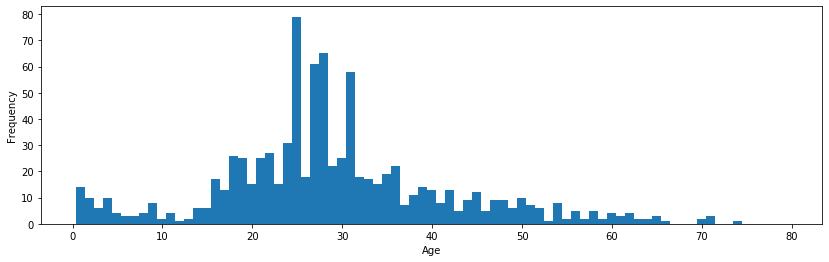

In [15]:
# Age distribuation 
fig , ax = plt.subplots(figsize=(14,4))
ax.hist(x = train_set['Age'], bins = np.arange(train_set['Age'].min() , train_set['Age'].max()) )
ax.yaxis.tick_left()
plt.xlabel('Age')
plt.ylabel('Frequency')

## Exploratory Visualization

Text(0.5, 1.0, 'Survival Breakdown (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

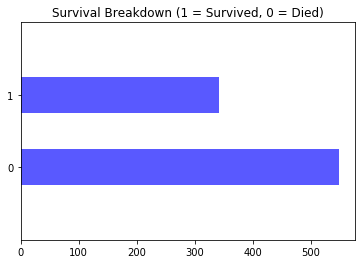

In [16]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
train_set.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(train_set.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

Text(0.5, 1.0, 'Survival Based on Gender (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

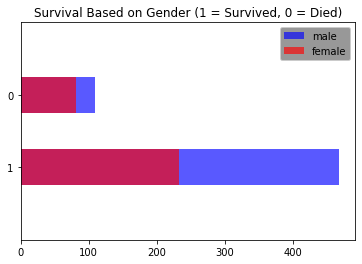

In [89]:
males_sur = train_set.Survived[train_set.Sex== 'male'].value_counts()
females_sur = train_set.Survived[train_set.Sex== 'female'].value_counts()


plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
males_sur.plot(kind='barh', color="blue",label='male', alpha=.65)
females_sur.plot(kind='barh', color="red", label= 'female', alpha=.65)
ax.set_ylim(-1, len(train_set.Survived.value_counts())) 
legend = ax.legend(loc='upper right')
legend.get_frame().set_facecolor('C17')
plt.title("Survival Based on Gender (1 = Survived, 0 = Died)")

### The Following Script is From [This Notebook](https://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)

In [18]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65




ax1=fig.add_subplot(141)
female_highclass = train_set.Survived[train_set.Sex == 'female'][train_set.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = train_set.Survived[train_set.Sex == 'female'][train_set.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = train_set.Survived[train_set.Sex == 'male'][train_set.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = train_set.Survived[train_set.Sex == 'male'][train_set.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

### Ideas To Discover 
The Relationship between Survived and :
- the name title 
- age
- age based on gender
- isAlone
- Embarked
- Embarked based on Pclass
- name title based on Pclass


In [19]:
# Ref: https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook#Step-3:-Prepare-Data-for-Consumption

train_set['FamilySize'] = train_set ['SibSp'] + train_set['Parch'] + 1
train_set['IsAlone'] = 1 #initialize to yes/1 is alone
train_set['IsAlone'].loc[train_set['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1
#quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
train_set['Title'] = train_set['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

/Users/yarasaleh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
train_set['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [25]:
print(train_set['Title'].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Capt              1
Ms                1
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Name: Title, dtype: int64


In [80]:
#cleanup rare title names
#choosing the titles that will be remove is abed on : the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/

stat_min = 10 
#this will create a true false series with title name as index
title_names = (train_set['Title'].value_counts() < stat_min)


#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
train_set['Title'] = train_set['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(train_set['Title'].value_counts())
print("-"*10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


In [81]:
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,1,Misc
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,4,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1,Mr
